In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Instructions

## **Assignment Instructions**

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* **How to run this on google colab**: Uncomment the below code and replace wherever necessary to run this assignment on google colab (only if you want to - jupyter notebooks work just fine)

In [2]:
#Linking google colab to your drive folder
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

In [3]:
#Replace 'Assignment 2 DS' with the path of the folder of your assignment
#%cd /content/gdrive/My\ Drive/Assignment 2 DS

## **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

## **Grading**

Grading is broken down into autograded answers and free response.

* For autograded answers, the results of your code are compared to provided and/or hidden tests.

* For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

* **Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?**


# **World Happiness Report**

## **Introduction**

Happiness has always been one of those fluctuating emotional states for humans, perhaps more so in light of recent events. With reports by 'World Happiness Report', publication of the Sustainable Development Solutions Network, coming in every year, you have decided to embark on a journey to uncover just how happy the citizens of countries around the world perceive themselves to be. 

But how can happiness be measured? Are there reliable comparisons of happiness across time and space that can give us clues regarding what makes people or even countries to declare themselves as ‘happy’? Well, this is exactly what our task is.

In this assignment, we aim to analyse the data and empirical evidence that might answer these questions. Our focus here will be on survey-based measures of self-reported happiness and life satisfaction. 



## **Importing Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
from statsmodels.graphics.gofplots import qqplot

## **Loading Data**

In [5]:
df_2015 = pd.read_pickle('cleaned_2015.pkl')
df_2017 = pd.read_pickle('cleaned_2017.pkl')
df_2019 = pd.read_pickle('cleaned_2019.pkl')

## **Exploratory Data Analysis**

### **EDA Part 1: Distributions**

In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed.

Are there any variables across all years which are skewed?

<!-- BEGIN QUESTION -->

**Question 1:** Use kernel estimation density plots to observe the skewness in each variable across the three years: 2015, 2017 and 2019. If you think there is any variable that does not need to be plotted, leave a rationale for it in the form of a comment before the graphs code.

*Tip: You can use for loops to keep your code concise*

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. Make sure each variable has **one** figure, displaying the skewness for the three years mentioned above in the same figure.  

<!--
BEGIN QUESTION
name: q1
points: 8
manual: true
-->

In [ ]:
## solution ##
#country doesn't need to be plotted as it serves as an identifier and is unique for each row
#region
#for columns in ['GDP_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'trust']:
for frame in [df_2015, df_2017, df_2019]:
    for year in [2015, 2017, 2019]:
        ax = frame.plot(kind='kde', x='GDP_per_capita', label=year, bw_method=0.3)
        ax

<!-- END QUESTION -->

**Question 2:** Calculate skew values for each variable using an appropriate function.

*Answering Guidelines*: Assign the skew values for each dataframe to the placeholders given below in the code cell. 

<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [ ]:
df_2015_skew = ...
df_2017_skew = ...
df_2019_skew = ...

In [ ]:
grader.check("q2")

<!-- BEGIN QUESTION -->

*Question 3:* **Briefly** comment on the type of skewness of each variable. 

*Answering Guidelines*: As shown by the plots in the previous question, you need not differentiate variables year-wise while commenting on whether a certain variable is right or left skewed since there is consistency in this pattern. A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



### **EDA Part 2: Happiness in 2019**

It's common knowledge that Scandinivia and some other parts of Western Europe consist of countries that are ranked high in happiness, whereas some countries belonging to regions like Africa or Asia are far from being labelled happy. However, the reason we asked you to incorporate the *regions* column into 2019, is to enable you to resolve your curosity of what the world looked like in terms of happiness in 2019.


#### **2A: Region Wise Analysis**

<!-- BEGIN QUESTION -->

**Question 4:** Make use of a bar plot to plot the Happiness Score for all regions across the world. Add a horizontal line for average happiness score on the plot. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q4_1
points: 3
manual: true
-->

In [ ]:
## solution ##
df = df_2019.groupby(['region']).mean()
df.reset_index(inplace=True)
ax = df.plot.bar(x='region', y='score')
ax.axhline(df_2019['score'].mean(), color='green', linewidth=2, label='average happiness')
ax

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comment on whether you think the world is a happy place? 

*Answering Guidelines*: a placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q4_2
points: 1
manual: true
-->

I would say no since some of the most populated regions in the world have lower than average happiness and the score variable is skewed raising the average.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5:** Make use of a Box Plot to get a complete picture of the variation in Happiness Score across regions.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q5
points: 2
manual: true
-->

In [ ]:
## solution ##
ax2 = df_2019.boxplot(column='score', by='region', rot=90)
ax2

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6:** Use the most suitable visualization to display the number of countries within each region. Leave your rationale in the form of a comment in the same code cell.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q6
points: 2
manual: true
-->

In [ ]:
## solution ##
df2 = df_2019.groupby(['region']).count()
df2.reset_index(inplace=True)
ax3 = df2.plot.bar(x='region', y='country')
ax3

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 7:** Using the visualizations above, comment on whether comparing happiness region-wise is a good idea? What do the results suggest?

*Answering Guidelines*: a placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q7
points: 1
manual: true
-->

No, because not each region is equally represented since there are very few countries from some regions in our dataset.

<!-- END QUESTION -->



#### **2B: Country Wise Analysis**

<!-- BEGIN QUESTION -->

**Question 8:** Make use of a bar plot to display the Happiness Score for the top 10 happiest countries across the world in descending order of happiness score. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q8
points: 2
manual: true
-->

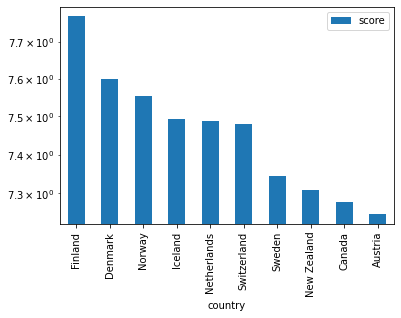

In [7]:
## solution ##
df3 = df_2019.sort_values(by='score', ascending=False).head(10)
ax4 = df3.plot.bar(x='country', y='score', rot=90, logy=True)
ax4

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 9:** State the country that looks the most happy and suggest reasons as to why it maybe so.

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
* You need not consult the data specifically for reasons - answer as if you are building an intuition for what could the possible reasons be.


<!--
BEGIN QUESTION
name: q9
points: 1
manual: true
-->

Finland. It seems to have one of the highest scores for how trustworthy the citizens think their government is. Since it ranks lower on other factors, this seems to be a likely reason for the high happiness score.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 10:** Make use of a bar plot to display the Happiness Score for the 10 least happy countries across the world in descending order of happiness score. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q10
points: 2
manual: true
-->

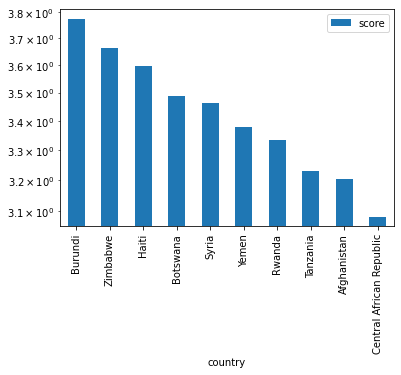

In [8]:
## solution ##
df4 = df_2019.sort_values(by='score', ascending=False).tail(10)
ax5 = df4.plot.bar(x='country', y='score', rot=90, logy=True)
ax5

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 11:** State the country that looks the least happy and suggest reasons as to why it may be so?

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
* You need not consult the data specifically for reasons - answer as if you are building an intuition for what could the possible reasons be.

<!--
BEGIN QUESTION
name: q11
points: 1
manual: true
-->

Central African Republic. It has very low scores for social support and trust in the government. Citizens seem to have a general mistrust in both family and institutions.

<!-- END QUESTION -->



Now that you've carefully thought about the underlying reasons behind the previously shown variations in happiness, it is time for you to use the data to come up with possible reasons and factors.


<!-- BEGIN QUESTION -->

**Question 12:** Show the relationship between all the variables in the form of a correlation matrix.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. We do not expect you to be well versed with correlation coefficients so feel free to skip that detail for now.

<!--
BEGIN QUESTION
name: q12
points: 2
manual: true
-->

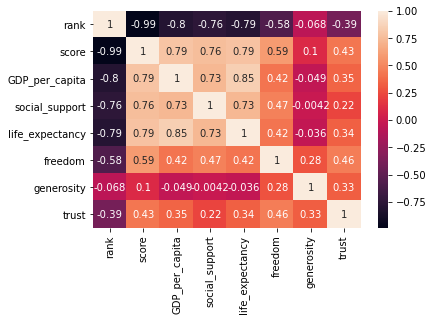

In [9]:
## solution ##
corrmatrix = df_2019.corr()
sn.heatmap(corrmatrix, annot=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 13:** What does the output above indicate? Briefly indicate which relationships seem significant, and describe how so (linear, positive, negative etc). 

*Tip:* The following article is a good read: https://www.statology.org/how-to-read-a-correlation-matrix/

*Answering Guidelines*: A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed and make sure to clearly show your rationale.

<!--
BEGIN QUESTION
name: q13
points: 3
manual: true
-->

Score has a strong, positive linear relationship with GDP_per_capita, social support and life expectancy. It is weakly positively correlated with freedom, generosity and trust.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 14:** Another way of visualizing relationships is using scatterplots. Use scatterplots to display how Happiness Score is affected every other variable in the data.

*Answering Guidelines*: 
* Follow the instructions given in the 'Grading' section with regards to plots. 
* Make sure to display every variable against Happiness score.
* Make use of a for loop or subplots to display all the plots through one code cell.
<!--
BEGIN QUESTION
name: q14
points: 14
manual: true
-->

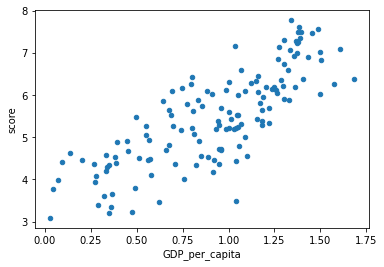

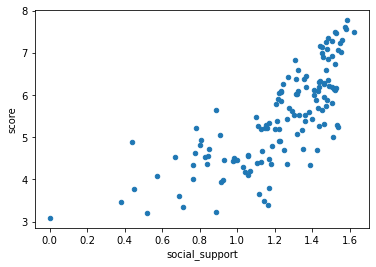

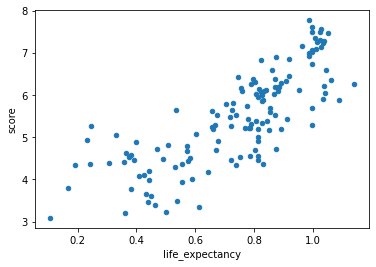

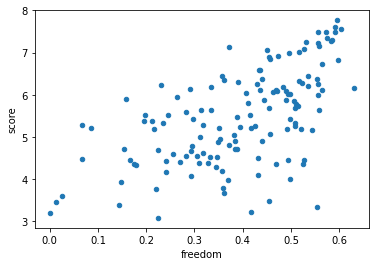

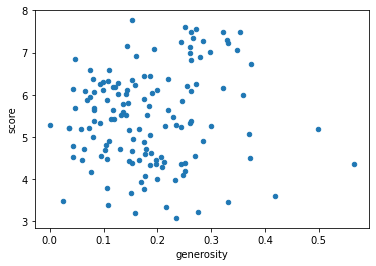

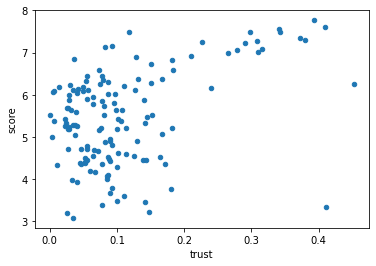

In [10]:
## solution ##
for columns in ["GDP_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "trust"]:
    ax = df_2019.plot.scatter(x=columns, y='score')
    ax

<!-- END QUESTION -->



#### **2C: A Trip To The Past**

Now that you have fairly understood the trend in happiness score within a single year, it is time to take a look at what's been happening over the past 4 years - were the countries always this happy/sad? 

The task at hand is to compare the trend of the happiness score for the top 10 happiest countries in 2019 over the last 4 years.

**Question 15:** Extract the top 10 happiest countries from the 2019 dataset and combine their happiness scores from 2017 and 2015, all in one dataset.

*Answering Guidelines*: 
* ```history``` must have an additional 'year' columns which contains information of which year the particular data point is from. Feel free to add such a column since it is not part of your original dataset.
* ```history``` must have three data points corresponding to the three years for every country.
* Make sure there are no extra columns while making the ```history``` table. If such columns make it to the table, make sure to drop them.

<!--
BEGIN QUESTION
name: q15
points: 5
-->

In [34]:
countrylist = df3['country'].tolist()
df_2019sub = df_2019[df_2019['country'].isin(countrylist)]
df_2019sub.insert(loc=10, column='year', value=2019)
df_2017sub = df_2017[df_2017['country'].isin(countrylist)]
df_2017sub.insert(loc=10, column='year', value=2017)
df_2015sub = df_2015[df_2015['country'].isin(countrylist)]
df_2015sub.insert(loc=10, column='year', value=2015)
history = pd.concat([df_2019sub, df_2017sub, df_2015sub])
history

,rank,country,score,GDP_per_capita,social_support,life_expectancy,freedom,generosity,trust,region,year
0,1,Finland,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,Western Europe,2019
1,2,Denmark,7.600,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,Western Europe,2019
2,3,Norway,7.554,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,Western Europe,2019
3,4,Iceland,7.494,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,Western Europe,2019
4,5,Netherlands,7.488,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,Western Europe,2019
5,6,Switzerland,7.480,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,Western Europe,2019
6,7,Sweden,7.343,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,Western Europe,2019
7,8,New Zealand,7.307,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,Australia and New Zealand,2019
8,9,Canada,7.278,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,North America,2019
9,10,Austria,7.246,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,Western Europe,2019


In [35]:
grader.check("q15")

All tests passed!

**Question 16:** To plot the Happiness Scores of the 10 countries across 4 years, we would need to ensure that the dataframe has a logical structure to it. 

One of the ways in which this could be done is using ```.pivot_table()```. Think of what could be the most logical structure to visualize this information in the form of a table, and use the function to ensure such a structure.

*Answering Guidelines*: Store the output in the ```history_table```

<!--
BEGIN QUESTION
name: q16
points: 5
-->

In [98]:
history_table = pd.pivot_table(history, index='country', columns='year')
history_table

GDP_per_capita                   freedom                   \
year                  2015      2017   2019     2015      2017   2019   
country                                                                 
Austria            1.33723  1.487097  1.376  0.62433  0.567766  0.532   
Canada             1.32629  1.479204  1.365  0.63297  0.611101  0.584   
Denmark            1.32548  1.482383  1.383  0.64938  0.626007  0.592   
Finland            1.29025  1.443572  1.340  0.64169  0.617951  0.596   
Iceland            1.30232  1.480633  1.380  0.62877  0.627163  0.591   
Netherlands        1.32944  1.503945  1.396  0.61576  0.585384  0.557   
New Zealand        1.25018  1.405706  1.303  0.63938  0.614062  0.585   
Norway             1.45900  1.616463  1.488  0.66973  0.635423  0.603   
Sweden             1.33171  1.494387  1.387  0.65980  0.612924  0.574   
Switzerland        1.39651  1.564980  1.452  0.66557  0.620071  0.572   

            generosity                  index  ... rank  score                \
year              2015      2017   2019  2015  ... 2019   2015   2017   2019   
country                                        ...                             
Austria        0.33088  0.316472  0.244    12  ...   10  7.200  7.006  7.246   
Canada         0.45811  0.435540  0.285     4  ...    9  7.427  7.316  7.278   
Denmark        0.34139  0.355280  0.252     2  ...    2  7.527  7.522  7.600   
Finland        0.23351  0.245483  0.153     5  ...    1  7.406  7.469  7.769   
Iceland        0.43630  0.475540  0.354     1  ...    4  7.561  7.504  7.494   
Netherlands    0.47610  0.470490  0.322     6  ...    5  7.378  7.377  7.488   
New Zealand    0.47501  0.500005  0.330     8  ...    8  7.286  7.314  7.307   
Norway         0.34699  0.362012  0.271     3  ...    3  7.522  7.537  7.554   
Sweden         0.36262  0.385399  0.267     7  ...    7  7.364  7.284  7.343   
Switzerland    0.29678  0.290549  0.263     0  ...    6  7.587  7.494  7.480   

            social_support                     trust                   
year                  2015      2017   2019     2015      2017   2019  
country                                                                
Austria            1.29704  1.459945  1.475  0.18676  0.221060  0.226  
Canada             1.32261  1.481349  1.505  0.32957  0.287372  0.308  
Denmark            1.36058  1.551122  1.573  0.48357  0.400770  0.410  
Finland            1.31826  1.540247  1.587  0.41372  0.382612  0.393  
Iceland            1.40223  1.610574  1.624  0.14145  0.153527  0.118  
Netherlands        1.28017  1.428939  1.522  0.31814  0.282662  0.298  
New Zealand        1.31967  1.548195  1.557  0.42922  0.382817  0.380  
Norway             1.33095  1.533524  1.582  0.36503  0.315964  0.341  
Sweden             1.28907  1.478162  1.487  0.43844  0.384399  0.373  
Switzerland        1.34951  1.516912  1.526  0.41978  0.367007  0.343  

[10 rows x 30 columns]

In [ ]:
grader.check("q16")

<!-- BEGIN QUESTION -->

**Question 17:** Make use of a line plot to display the trend in Happiness Scores for all the 10 countries across the 4 years.

*Answering Guidelines*: 
* Follow the instructions given in the 'Grading' section with regards to plots. 
* The countries must be all in the same plot

<!--
BEGIN QUESTION
name: q17
points: 3
manual: true
-->

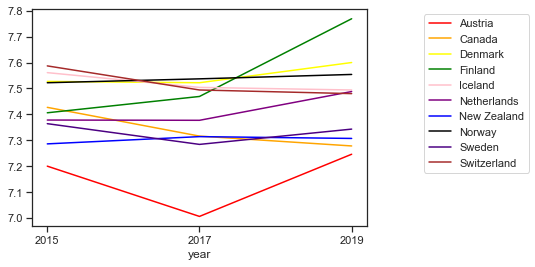

In [100]:
history_table2 = pd.pivot_table(history, index='year', columns='country', values='score')
my_colors = ['red', 'orange', 'yellow', 'green', 'pink', 'purple', 'blue', 'black', 'indigo', 'brown']
ax4 = history_table2.plot(xticks=[2015, 2017, 2019], kind="line", color=my_colors, secondary_y=['country']).legend(bbox_to_anchor=(1.5, 1))
ax4

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 18:** Using the Line Plot above, list down all countries showing a consistent trend (positive or negative).

*Answering Guidelines*: A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q18
points: 1
manual: true
-->

Canada, Netherlands, Finland, Iceland, Switzerland

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 19:** From the list in the previous question, pick any 3 countries and perform a manual observation to see whether any variables might be contributing to the trend shown. For any such country, also suggest a suitable plot for visualizing the affects. 

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed
* If you think there are no such factors, simply mention that. The purpose of this question is to see your rationale.


<!--
BEGIN QUESTION
name: q19
points: 3
manual: true
-->

Canada, negative trend, probably due to

<!-- END QUESTION -->



# Congratulations!! 

You have managed to reach the finishing line. 

**Reminder:** Don't forget to answer question 2 in 'Cleaning Part 1' of Part 1.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("2XXXXXXX_2.ipynb")